In [1]:
s3_tests = []
for m in ["0", "55", "111", "167", "222", "278", "334", "389", "445"]:
    for i in ["00", "01", "02", "03", "04"]:
        s3_tests.append(f"s3://aegovan-data/chemprot_adverserial/predictions_chemprot-affable-train-767-210-{m}-{i}-202212041527/202212062020/chemprot_abstract_test.json.json")


In [2]:
import sys, os, pandas as pd, io
sys.path.append("../src")

import utils

In [3]:
import sagemaker
from sklearn.metrics import precision_recall_fscore_support



In [4]:
import io, pandas as pd, re

def create_df(s3_prefix, confidence=0.0):
    
    df  = pd.read_json(io.StringIO(sagemaker.s3.S3Downloader.read_file( s3_prefix)))
    
    total_predictions= len(df)
    df = df.query(f"confidence > {confidence} ")

    name = s3_prefix
    r = re.search(  "predictions_chemprot-affable-train-(\d+)-(\d+)-(\d+)", s3_prefix)
    name= s3_prefix
    train_size= int(r.group(1))
    train_pos_size= int(r.group(2))
    train_affable_neg= int(r.group(3))
    prediction_above_threshold = len(df)

    p,r,f,s = precision_recall_fscore_support(df["label"], 
                         df["prediction"], pos_label = 1, average="binary", zero_division=0)
        
    return { "Name": name, 
                    "Precision":p,
                    "Recall":r,
                    "F1":f,  
                  #  "Threshold": "HighConfidence", 
                    "Support": s, 
                        "TrainSize":train_size, "TrainSizePositive": train_pos_size,
                        "TrainAffableNegative" : train_affable_neg,
                        "TrainAffableNegativeRate" : round(train_affable_neg/(train_size-train_pos_size),1),
                        "PredictionsSize": total_predictions, 
                   "PredictionsAboveThresholdSize": prediction_above_threshold,
                    "PredictionsAboveThresholdRatio" :prediction_above_threshold/total_predictions
           
           }
    
    

def create_dfs_from_prefixes(s3_prefixes):
    result = [ create_df(s, confidence=0.0) for s in s3_prefixes]
    df =  pd.DataFrame(result)
    return df


In [5]:
df_stats = create_dfs_from_prefixes(s3_tests)


In [6]:
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAffableNegative,TrainAffableNegativeRate,PredictionsSize,PredictionsAboveThresholdSize,PredictionsAboveThresholdRatio
0,s3://aegovan-data/chemprot_adverserial/predict...,0.30,0.72,0.43,None,767,210,0,0.0,5744,5744,1.0
1,s3://aegovan-data/chemprot_adverserial/predict...,0.21,0.76,0.33,None,767,210,0,0.0,5744,5744,1.0
2,s3://aegovan-data/chemprot_adverserial/predict...,0.30,0.61,0.40,None,767,210,0,0.0,5744,5744,1.0
3,s3://aegovan-data/chemprot_adverserial/predict...,0.24,0.45,0.32,None,767,210,0,0.0,5744,5744,1.0
4,s3://aegovan-data/chemprot_adverserial/predict...,0.21,0.52,0.30,None,767,210,0,0.0,5744,5744,1.0
5,s3://aegovan-data/chemprot_adverserial/predict...,0.27,0.53,0.36,None,767,210,55,0.1,5744,5744,1.0
6,s3://aegovan-data/chemprot_adverserial/predict...,0.25,0.51,0.34,None,767,210,55,0.1,5744,5744,1.0
7,s3://aegovan-data/chemprot_adverserial/predict...,0.24,0.52,0.33,None,767,210,55,0.1,5744,5744,1.0
8,s3://aegovan-data/chemprot_adverserial/predict...,0.27,0.72,0.39,None,767,210,55,0.1,5744,5744,1.0
9,s3://aegovan-data/chemprot_adverserial/predict...,0.27,0.58,0.36,None,767,210,55,0.1,5744,5744,1.0


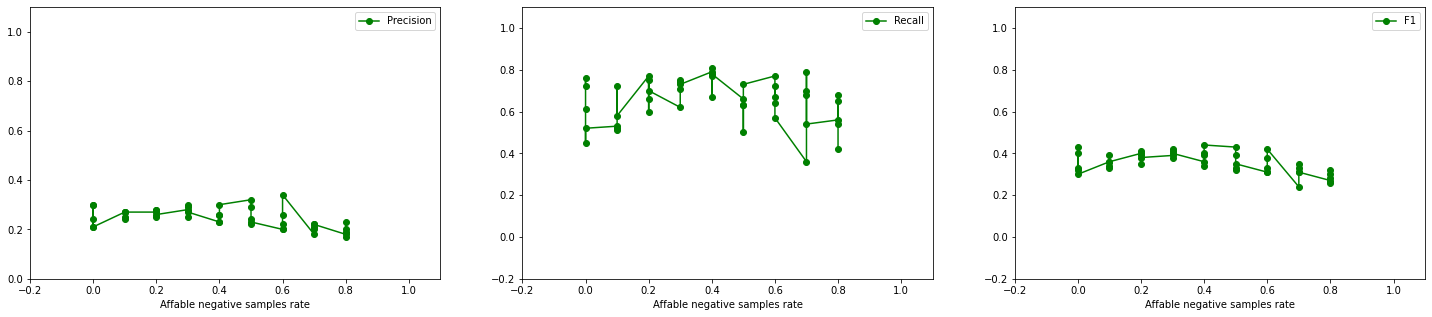

In [7]:
import warnings, matplotlib.pyplot as plt

def plot_comparison(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAffableNegativeRate" : "Affable negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }

        df[["Precision", "TrainAffableNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Affable negative samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(-0.2, 1.1), ax=ax[0], color=(my_colors))

        df[["Recall","TrainAffableNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Affable negative samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[1], color=(my_colors))

        df[["F1","TrainAffableNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Affable negative samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[2], color=(my_colors))

       
        plt.legend()

plot_comparison(df_stats)   

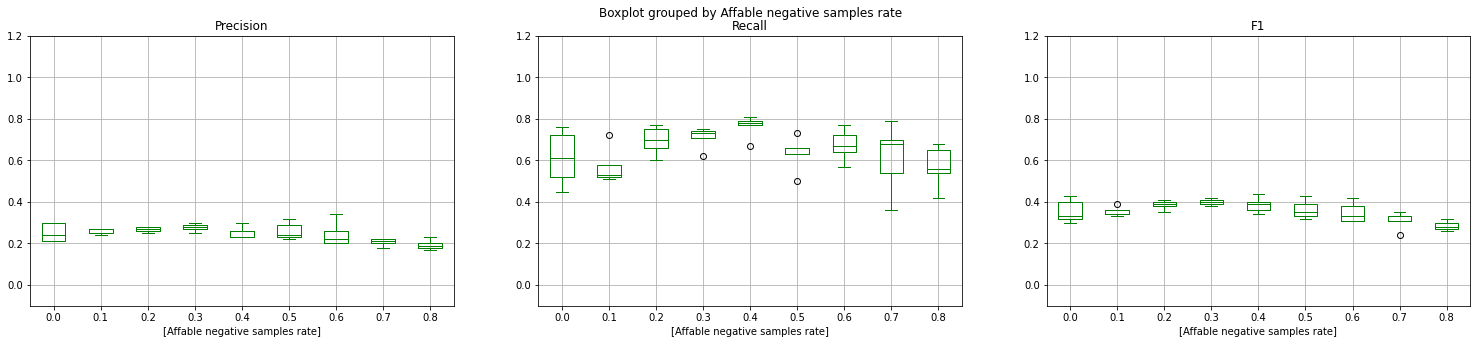

In [8]:
def plot_comparison_box(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAffableNegativeRate" : "Affable negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }
        ax[0].set_ylim(-0.1,1.2)
        df[["Precision", "TrainAffableNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Affable negative samples rate",  ax=ax[0], color="green")

        ax[1].set_ylim(-0.1,1.2)
        df[["Recall","TrainAffableNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Affable negative samples rate",  ax=ax[1], color="green")

        ax[2].set_ylim(-0.1,1.2)
        df[["F1","TrainAffableNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Affable negative samples rate",  ax=ax[2], color="green")

       
        #plt.legend()

plot_comparison_box(df_stats)

<AxesSubplot:xlabel='TrainAffableNegativeRate', ylabel='PredictionsAboveThresholdRatio'>

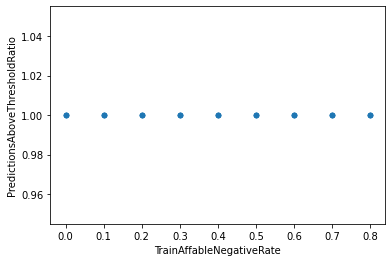

In [9]:
df_stats.plot.scatter(x="TrainAffableNegativeRate", y="PredictionsAboveThresholdRatio")

In [10]:
df_stats.groupby("TrainAffableNegativeRate")[["Precision", "Recall", "F1", "PredictionsAboveThresholdSize"]].describe().T

TrainAffableNegativeRate                     0.0          0.1          0.2  \
Precision                     count     5.000000     5.000000     5.000000   
                              mean      0.252000     0.260000     0.268000   
                              std       0.045497     0.014142     0.013038   
                              min       0.210000     0.240000     0.250000   
                              25%       0.210000     0.250000     0.260000   
                              50%       0.240000     0.270000     0.270000   
                              75%       0.300000     0.270000     0.280000   
                              max       0.300000     0.270000     0.280000   
Recall                        count     5.000000     5.000000     5.000000   
                              mean      0.612000     0.572000     0.696000   
                              std       0.130652     0.087006     0.068775   
                              min       0.450000     0.510000     0.600000   
                              25%       0.520000     0.520000     0.660000   
                              50%       0.610000     0.530000     0.700000   
                              75%       0.720000     0.580000     0.750000   
                              max       0.760000     0.720000     0.770000   
F1                            count     5.000000     5.000000     5.000000   
                              mean      0.356000     0.356000     0.386000   
                              std       0.055946     0.023022     0.023022   
                              min       0.300000     0.330000     0.350000   
                              25%       0.320000     0.340000     0.380000   
                              50%       0.330000     0.360000     0.390000   
                              75%       0.400000     0.360000     0.400000   
                              max       0.430000     0.390000     0.410000   
PredictionsAboveThresholdSize count     5.000000     5.000000     5.000000   
                              mean   5744.000000  5744.000000  5744.000000   
                              std       0.000000     0.000000     0.000000   
                              min    5744.000000  5744.000000  5744.000000   
                              25%    5744.000000  5744.000000  5744.000000   
                              50%    5744.000000  5744.000000  5744.000000   
                              75%    5744.000000  5744.000000  5744.000000   
                              max    5744.000000  5744.000000  5744.000000   

TrainAffableNegativeRate                     0.3          0.4          0.5  \
Precision                     count     5.000000     5.000000     5.000000   
                              mean      0.278000     0.256000     0.260000   
                              std       0.019235     0.028810     0.043012   
                              min       0.250000     0.230000     0.220000   
                              25%       0.270000     0.230000     0.230000   
                              50%       0.280000     0.260000     0.240000   
                              75%       0.290000     0.260000     0.290000   
                              max       0.300000     0.300000     0.320000   
Recall                        count     5.000000     5.000000     5.000000   
                              mean      0.710000     0.764000     0.630000   
                              std       0.052440     0.054589     0.083367   
                              min       0.620000     0.670000     0.500000   
                              25%       0.710000     0.770000     0.630000   
                              50%       0.730000     0.780000     0.630000   
                              75%       0.740000     0.790000     0.660000   
                              max       0.750000     0.810000     0.730000   
F1                            count     5.000000     5.000000     5.000000   
                     

In [20]:
from scipy import stats


 
    
stats.ttest_ind(df_stats.query("TrainAffableNegativeRate == 0.0")["Precision"], 
                df_stats.query("TrainAffableNegativeRate == 0.8")["Precision"])

Ttest_indResult(statistic=2.5434682559903847, pvalue=0.03452387876553226)

In [19]:
    
stats.ttest_ind(df_stats.query("TrainAffableNegativeRate == 0")["F1"], 
                df_stats.query("TrainAffableNegativeRate == 0.8")["F1"])

Ttest_indResult(statistic=2.5697808437502334, pvalue=0.03313885947608214)

In [16]:
stats.ttest_ind(df_stats.query("TrainAffableNegativeRate == 0")["Recall"], 
                df_stats.query("TrainAffableNegativeRate == 0.8")["Recall"])

Ttest_indResult(statistic=0.5656084766492211, pvalue=0.5871687082125328)